In [1]:
import zipfile
from urllib import request
 
import matplotlib.image as mpimg
import random
%matplotlib inline
import cv2
from glob import glob
import keras,math
import cv2 as cv 
import pandas as pd
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape ,MaxPooling2D, advanced_activations
from keras.layers import concatenate, Concatenate,Dense, Flatten,SeparableConv2D,LeakyReLU,GlobalAveragePooling2D
from keras.layers import BatchNormalization, RepeatVector, Permute, Activation, Reshape, Flatten,Multiply
from keras.layers.advanced_activations import PReLU

from keras.layers import Lambda,Add,Dropout,SpatialDropout2D,DepthwiseConv2D,normalization
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
from sp import Subpixel 
import tensorflow as tf 
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from frn import frnm
# aita die akta tensor e sob image k nie astasi
 
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
from SpectralNormalizationKeras import DenseSN, ConvSN2D

# from func.soat import dtl,up,ca,rg,rcab,rir,normalize,denormalize,w2,w3,wk,allc
# from func.fun import vds,urb,cnb,ad,resm,resc,corb,bg,drb,drv,urv,nos,tf_log10,ssim,PSNR,lcl,bol,br
# from func.fun import ref,resl,resn,m1,m2,psp,au,ba,m4,dt,w3,sdtl,unt,vts,colorn
# from func.f2 import  reb,ridtn,atn
# from func.arcl import  vts, uplp,ud,v1,r1,psp,w3,unt,pspn,unt2,unt3,idtl,allc,allc1,fcl1,mdsr,mdsr1,pr1,actf,cmv
# from func.arcl import ca,rem,uplt,untr

def psnr(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,1.0)
def ssim(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,1.0)


Using TensorFlow backend.


In [2]:
# aita die akta tensor e sob image k nie astasi
 
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add

In [3]:
def PSNRv(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr 
def ssimv(x, y):
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    var_x = np.var(x)
    var_y = np.var(y)
    cov = np.mean((x - mu_x) * (y - mu_y))
    c1 = np.square(0.01 * 255)
    c2 = np.square(0.03 * 255)
    return ((2 * mu_x * mu_y + c1) * (2 * cov + c2)) / ((mu_x**2 + mu_y**2 + c1) * (var_x + var_y + c2)) 

In [4]:
 
from func.fun import vds,urb,cnb,ad,resm,resc,corb,bg,drb,drv,urv,nos,tf_log10,ssim,PSNR,lcl,bol,br
from func.fun import ref,resl,resn,m1,m2,psp,au,ba,m4,dt,w3,sdtl,unt,vts 
from func.f2 import  reb,ridtn,atn
def plot_sample(lr, sr):
    plt.figure(figsize=(14, 12))

    images = [lr, sr]
    titles = ['denoised', 'noisy']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
def imgps(x):
    p = x[0] * 255
    p = p.astype(np.uint8)
    p = Image.fromarray(p)
    return p

In [5]:
#original data
b=np.load('256t0.npy')
w=128
#original val data
v=np.load('dn256t.npy')
w=128

 

In [6]:
#original data
b=np.load('128n\lrg28.npy')
w=128

#original val data
v=np.load('vns.npy')
v=np.load('dn256t.npy')
w=128



In [7]:
b.shape 
#Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(x)
#Lambda(lambda x:x**2)(x)
#x=Lambda(lambda x:x+1)(x)
#x = Activation('relu')(x)

(9656, 128, 128, 3)

In [8]:
def cl(y_true, y_pred):
    diff = y_pred - y_true
    o=K.mean(K.sqrt(K.square(diff) + K.epsilon())) 
    return o*20

b=b/255

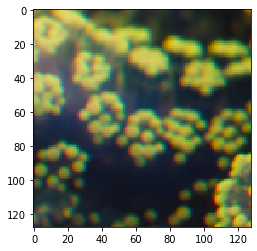

In [9]:
plt.figure(figsize=(4, 4))
import tensorflow as tf 
n=b[980]
plt.imshow(n)

In [10]:
plt.figure(figsize=(4, 4)) 
#training noisy data
c=np.load('128n\lrg28.npy')
c=c/255
xh = c  
xl = c
rn=b.shape[0]
 
di=128
fa=4
diml=(di//fa,di//fa)
dim=(di,di)
for i in range (rn):
    a=xl[i]
    lo=cv2.resize(a, diml, interpolation = cv2.INTER_AREA)
    lo = cv2.resize(lo, dim, interpolation = cv2.INTER_AREA)
    xl[i]=lo
    

tns=xl 
#tns=np.clip(tns, 0, 1)

<Figure size 288x288 with 0 Axes>

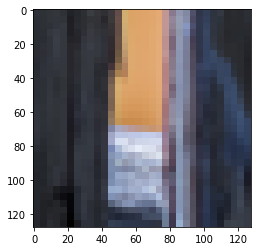

In [11]:
plt.figure(figsize=(4, 4)) 
 
n=xl[4444]
plt.imshow(n)
 

In [12]:
#print(n)

In [13]:
#print(n)

In [14]:
b.shape[0]

9656

In [15]:
ba=4

c=np.random.normal(loc=0, scale=1, size=(ba, w,w,3 ))


In [16]:

def psnr(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,1.0)
def ssim(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,1.0)

def ud(b,f):
    x=Conv2D(f, kernel_size=7, strides=8, padding='same')(b)  
    x = Conv2DTranspose(f, 7, strides=8, padding='same')(x)
    x=add([b,x])
 
    return x

def v1(b):
    x=Subpixel(filters=3, kernel_size=1, r=1, padding='same')(b) 
    x=w3(x,32)
    x=Subpixel(filters=3, kernel_size=1, r=1, padding='same')(x) 
    x=w3(x,32)
    return x


def r1(input_tensor, features ):
    x = Conv2D(features, 3, activation='relu', padding='same')(input_tensor)
    x = Conv2D(features, 3, padding='same')(x)
    return add([input_tensor, x])

def rem(input_tensor, features):
    kernel=3
    x = Conv2D(features, (kernel, kernel), activation='relu', padding='same')(input_tensor)
    x = Conv2D(features, (kernel, kernel), padding='same')(x)
    return add([input_tensor, x])

def v2(b):
    x= ConvSN2D(32, kernel_size=1, strides=1, padding='same')(b)    
    x=vds(x,8) 
    x=w3(x,32)
    x=vds(x,8) 
    x=Subpixel(filters=3, kernel_size=1, r=1, padding='same')(x)  
    x=w3(x,32)
    x = Activation('relu')(x)
    return x


def cmv(b,f):
    x= DepthwiseConv2D(f,  strides=1, padding='same')(b)    
    y= Conv2D(f, kernel_size=3, strides=1, padding='same')(b)  
    z= SeparableConv2D(f, kernel_size=3, strides=1, padding='same')(b)  
    w = concatenate([x,y,z], axis = 3)
    x= ConvSN2D(f, kernel_size=3, strides=1, padding='same')(x)   
    #x = Activation('relu')(x)
    return x
 
def mdsr(ix,f):
    x=Conv2D(f, kernel_size=3, strides=1, padding='same')(ix)
    
    x1=r1(x,f)
    x1=r1(x1,f)
    x2=r1(x,f)
    x2=r1(x2,f)
    x3=r1(x,f)
    x3=r1(x3,f)
    x=add([x1,x2,x3])
    x=Conv2D(3, kernel_size=3, strides=1, padding='same')(x)
    return x 

def ca(input_tensor, filters, reduce=16):
    x = GlobalAveragePooling2D()(input_tensor)
    x = Reshape((1, 1, filters))(x)
    x = Dense(4,  activation='relu', kernel_initializer='he_normal', use_bias=False)(x)
    x = Dense(32,  activation='relu', kernel_initializer='he_normal', use_bias=False)(x)
    x = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(x)
    x = Multiply()([x, input_tensor])
 
    return x

def uplp(x):
    a= Conv2D(3, kernel_size=3, strides=1, padding='same')(x)  
    y=Conv2DTranspose(1, 3, strides=2, padding='same')(x)
    y= Conv2D(3, kernel_size=7, strides=2, padding='same')(y)   
    y=Conv2DTranspose(1, 3, strides=2, padding='same')(x)
    y= Conv2D(3, kernel_size=7, strides=2, padding='same')(y) 
    y=add([a,y])
    
    return y

from func.arcl import unt2,idtl,untr 
def mdsr1(ix,f):
    x=Conv2D(f, kernel_size=3, strides=1, padding='same')(ix)
    
    x1=r1(x,f)
    x1=r1(x1,f)
    x2=r1(x,f)
    x2=r1(x2,f)
    x3=r1(x,f)
    x3=r1(x3,f)
    x=add([x1,x2,x3])
    x=concatenate([x,x1,x2,x3 ], axis = 3)
    x=Conv2D(3, kernel_size=3, strides=1, padding='same')(x)
    return x 

In [17]:
from keras.layers import Input, Conv2D, Dense,  Activation,Convolution2D,Conv2DTranspose, MaxPooling2D,BatchNormalization, UpSampling2D
from keras.models import Model

w=b.shape[2]
input_img = Input(shape=(None,None,3))
#x= ConvSN2D(64, kernel_size=3, strides=1, padding='same')(input_img)  
for i in range (5):
    inp=uplp(input_img)
inp=Conv2D(16, kernel_size=7, strides=1, padding='same')(inp) 
     
x0=mdsr1(inp,32)
u=UpSampling2D(size=(2,2))(x0)
x=MaxPooling2D((3, 3), strides=2, padding='same')(u)
x=concatenate([x,x0,input_img,inp,untr(inp,16)], axis = 3)

x=Conv2D(3, kernel_size=3, strides=1, padding='same')(x) 
    
   
 
model = Model(input_img, x)
model.compile(loss='mae', optimizer='adam',    metrics=[psnr,ssim, "accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.4,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="weightdns.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

model.compile(loss='mae', optimizer='adam',    metrics=[psnr,ssim, "accuracy"])

 

In [19]:
#history = model.fit(tns, b,validation_split=0.2 , epochs=7000, batch_size=16, callbacks = [checkpoint,reduce_lr], shuffle=True)
history = model.fit(tns, b,validation_split=0.2 , epochs=7000, batch_size=16, callbacks = [checkpoint,reduce_lr])

Instructions for updating:
Use tf.cast instead.
Train on 7724 samples, validate on 1932 samples
Epoch 1/7000
7724/7724 [==============================] - 90s 12ms/step - loss: 0.0764 - psnr: 26.5563 - ssim: 0.7351 - acc: 0.8116 - val_loss: 0.0268 - val_psnr: 30.5598 - val_ssim: 0.7857 - val_acc: 0.8895

Epoch 00001: val_loss improved from inf to 0.02679, saving model to weightdns.hdf5
Epoch 2/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0288 - psnr: 29.9912 - ssim: 0.7821 - acc: 0.8919 - val_loss: 0.0287 - val_psnr: 30.1195 - val_ssim: 0.7926 - val_acc: 0.8859

Epoch 00002: val_loss did not improve from 0.02679
Epoch 3/7000
7724/7724 [==============================] - 83s 11ms/step - loss: 0.0277 - psnr: 30.6102 - ssim: 0.7900 - acc: 0.9015 - val_loss: 0.0251 - val_psnr: 31.6575 - val_ssim: 0.8023 - val_acc: 0.9071

Epoch 00003: val_loss improved from 0.02679 to 0.02514, saving model to weightdns.hdf5
Epoch 4/7000
7724/7724 [==============================] 

7724/7724 [==============================] - 85s 11ms/step - loss: 0.0232 - psnr: 33.3832 - ssim: 0.8238 - acc: 0.9346 - val_loss: 0.0224 - val_psnr: 33.6868 - val_ssim: 0.8229 - val_acc: 0.9389

Epoch 00058: val_loss did not improve from 0.02237
Epoch 59/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0232 - psnr: 33.3838 - ssim: 0.8238 - acc: 0.9346 - val_loss: 0.0224 - val_psnr: 33.6923 - val_ssim: 0.8230 - val_acc: 0.9364

Epoch 00059: val_loss did not improve from 0.02237
Epoch 60/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0232 - psnr: 33.3821 - ssim: 0.8238 - acc: 0.9342 - val_loss: 0.0224 - val_psnr: 33.6882 - val_ssim: 0.8229 - val_acc: 0.9368

Epoch 00060: val_loss did not improve from 0.02237
Epoch 61/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0232 - psnr: 33.3812 - ssim: 0.8238 - acc: 0.9348 - val_loss: 0.0224 - val_psnr: 33.6885 - val_ssim: 0.8230 - val_acc: 0.9298

Epoch 00061: val_loss

7724/7724 [==============================] - 84s 11ms/step - loss: 0.0231 - psnr: 33.3948 - ssim: 0.8239 - acc: 0.9340 - val_loss: 0.0224 - val_psnr: 33.6908 - val_ssim: 0.8229 - val_acc: 0.9346

Epoch 00088: val_loss did not improve from 0.02237
Epoch 89/7000
7724/7724 [==============================] - 83s 11ms/step - loss: 0.0231 - psnr: 33.3948 - ssim: 0.8239 - acc: 0.9340 - val_loss: 0.0224 - val_psnr: 33.6908 - val_ssim: 0.8229 - val_acc: 0.9323

Epoch 00089: val_loss did not improve from 0.02237
Epoch 90/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0231 - psnr: 33.3948 - ssim: 0.8239 - acc: 0.9345 - val_loss: 0.0224 - val_psnr: 33.6908 - val_ssim: 0.8229 - val_acc: 0.9321

Epoch 00090: val_loss did not improve from 0.02237
Epoch 91/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0231 - psnr: 33.3949 - ssim: 0.8239 - acc: 0.9344 - val_loss: 0.0224 - val_psnr: 33.6907 - val_ssim: 0.8229 - val_acc: 0.9347

Epoch 00091: val_loss

7724/7724 [==============================] - 83s 11ms/step - loss: 0.0231 - psnr: 33.3949 - ssim: 0.8240 - acc: 0.9346 - val_loss: 0.0224 - val_psnr: 33.6907 - val_ssim: 0.8229 - val_acc: 0.9326

Epoch 00118: val_loss did not improve from 0.02237
Epoch 119/7000
7724/7724 [==============================] - 83s 11ms/step - loss: 0.0231 - psnr: 33.3949 - ssim: 0.8240 - acc: 0.9344 - val_loss: 0.0224 - val_psnr: 33.6907 - val_ssim: 0.8229 - val_acc: 0.9326

Epoch 00119: val_loss did not improve from 0.02237
Epoch 120/7000
7724/7724 [==============================] - 84s 11ms/step - loss: 0.0231 - psnr: 33.3949 - ssim: 0.8240 - acc: 0.9347 - val_loss: 0.0224 - val_psnr: 33.6907 - val_ssim: 0.8229 - val_acc: 0.9326

Epoch 00120: val_loss did not improve from 0.02237
Epoch 121/7000
7724/7724 [==============================] - 83s 11ms/step - loss: 0.0231 - psnr: 33.3949 - ssim: 0.8240 - acc: 0.9346 - val_loss: 0.0224 - val_psnr: 33.6907 - val_ssim: 0.8229 - val_acc: 0.9325

Epoch 00121: val_l

KeyboardInterrupt: 

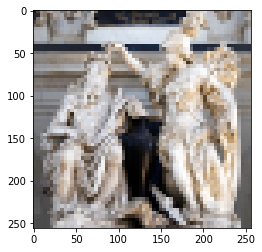

In [20]:
plt.figure(figsize=(4, 4))
v=np.load('dn256t.npy')
di=256
xs = v
vl=v
dim=(di,di)
fa=4
diml=(di//fa,di//fa)
for i in range (100):
    a=xs[i]
    lo=cv2.resize(a, diml, interpolation = cv2.INTER_AREA)
    lo = cv2.resize(lo, dim, interpolation = cv2.INTER_AREA)
    vl[i]=lo

n=vl[76]
plt.imshow(n)

In [21]:
 model.load_weights('weightdns.hdf5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 576x432 with 0 Axes>

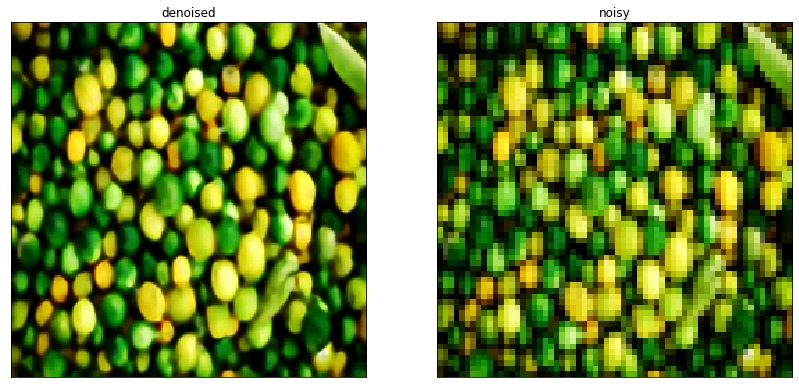

In [22]:
i=12
plt.figure(figsize=(8, 6))
q =  (vl[i])
 
 
per =  model.predict(vl)
p=per[i]
 
 
plot_sample( p,q)
 
 

In [23]:
path = 'D:/1A work/jupyter/udac/super res/imc'

for co in range (100):
    im=255*per[co]
    im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(path , "{}.jpg".format(co)), im)

(1, 512, 512, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


77.89542913609124
0.9999819933185538


<Figure size 1008x936 with 0 Axes>

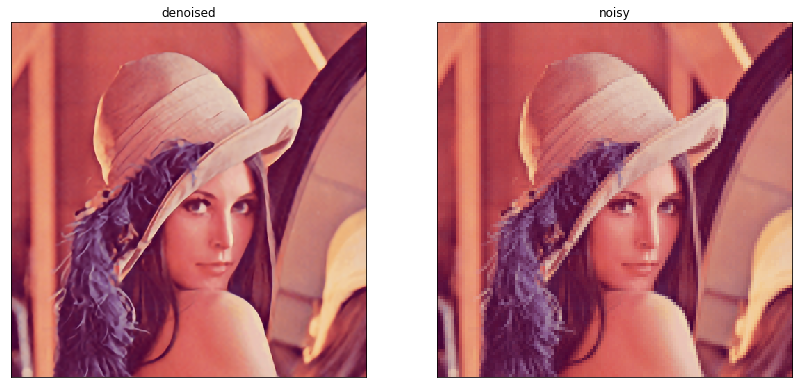

In [29]:
ar=[]
sigma=200/255
fa=4
a=cv2.imread("D:/1A work/dataset/SR_D/srval/14set/1 (8).png")
a= cv2.cvtColor(a, cv2.COLOR_BGR2RGB)/255
img = np.asarray(a) 
shapes = img.shape
dim=(shapes[1],shapes[0])
diml=(shapes[0]//fa,shapes[1]//fa)
n2= np.random.normal(scale=sigma, size=img.shape)
lo=cv2.resize(img, diml, interpolation = cv2.INTER_AREA)
lo = cv2.resize(lo, dim, interpolation = cv2.INTER_AREA)
 
 
ar.append(lo) 
ar = np.asarray(ar)
print(ar.shape)
 
plt.figure(figsize=(14,13))
q =  ar[0]
pr =  ar 
 
per =   model.predict(pr)[0]
p=per 

 
plot_sample(p,q)
print(PSNRv(a,per)) 
print(ssimv(a,per)) 